In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# DA on the Output Rate of Broker-1
df1b = pd.read_csv("Brok1OR.csv")
df1b.drop(['name'], axis=1, inplace=True)
df1b['timestamp'] = pd.to_datetime(df1b['timestamp'], unit='s')
df1b.head(3)

,timestamp,values,pod
0,2021-08-13 18:19:02,142079184,my-cluster-metrics-kafka-0
1,2021-08-13 18:19:32,147792392,my-cluster-metrics-kafka-0
2,2021-08-13 18:20:02,162523983,my-cluster-metrics-kafka-0


In [2]:
#Average Output Rate before rebalancing
orbr1 = df1b[(df1b['timestamp'] >= '2021-08-13 18:19:02') & (df1b['timestamp'] <= '2021-08-13 18:30:00')]
orbr1.head(3)
orbr1avg = orbr1['values'].mean()
print(orbr1avg)
orbr1.describe()


204595057.0


,values
count,2.200000e+01
mean,2.045951e+08
std,3.393117e+07
min,1.420792e+08
25%,1.642599e+08
50%,2.293220e+08
75%,2.306705e+08
max,2.306705e+08


In [3]:
#Average Output Rate During rebalancing
ordr1 = df1b[(df1b['timestamp'] >= '2021-08-13 18:31:00') & (df1b['timestamp'] <= '2021-08-13 18:43:00')]
ordr1.head(3)
ordr1avg = ordr1['values'].mean()
print(ordr1avg)
ordr1.describe()


382200122.25


,values
count,2.400000e+01
mean,3.822001e+08
std,9.279616e+07
min,2.306705e+08
25%,3.443472e+08
50%,3.879503e+08
75%,4.570459e+08
max,5.122019e+08


In [4]:
#T-Stats Analysis
from scipy.stats import ttest_ind
resb1or = ttest_ind(ordr1['values'], orbr1['values'])
print(resb1or)

Ttest_indResult(statistic=8.46671088490756, pvalue=8.707567045794883e-11)


In [5]:
orbr1.drop(['pod'], axis=1, inplace=True)
orbr1.head(10)
orbr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  22 non-null     datetime64[ns]
 1   values     22 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 528.0 bytes


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
ordr1.drop(['pod'], axis=1, inplace=True)
ordr1.head(10)
ordr1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 24 to 47
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  24 non-null     datetime64[ns]
 1   values     24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 576.0 bytes


Text(0.5, 1.0, 'Broker1 Output Rate')

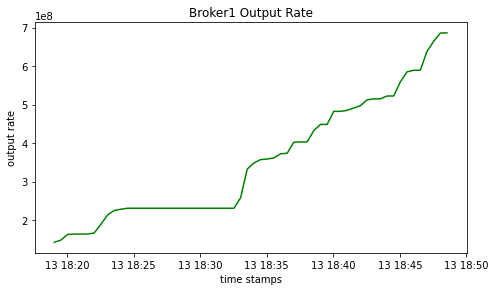

In [7]:
from datetime import datetime
#Output Rate for the entire load test
o1=[]
for dat in df1b.timestamp:
    # print (dat)
    o1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig1 = plt.figure(figsize=(10,4))
axe1 = fig1.add_axes([0.2, 0.1, 0.6, 0.8])
axe1.plot(o1,df1b['values'], 'g')
axe1.set_xlabel('time stamps')
axe1.set_ylabel('output rate')
axe1.set_title('Broker1 Output Rate')
#fig1.tight_layout()

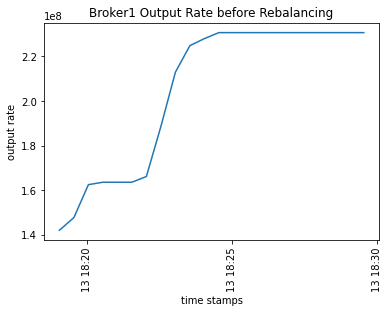

In [8]:
#Output Rate before rebalancing
b1=[]
for dat in orbr1.timestamp:
    # print (dat)
    b1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b1,orbr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('output rate')
plt.title('Broker1 Output Rate before Rebalancing')
plt.show()


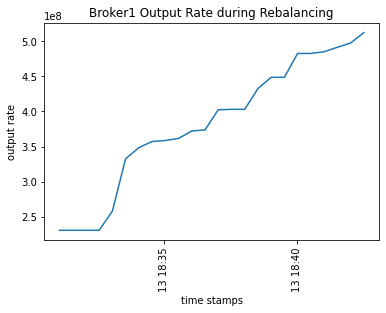

In [9]:
#Output Rate during rebalancing
d1=[]
for dat in ordr1.timestamp:
    # print (dat)
    d1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d1,ordr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('output rate')
plt.title('Broker1 Output Rate during Rebalancing')
plt.show()

In [10]:
# DA on the Output Rate of Broker-2
df2b = pd.read_csv("Brok2OR.csv")
df2b.drop(['name'], axis=1, inplace=True)
df2b['timestamp'] = pd.to_datetime(df2b['timestamp'], unit='s')
df2b.head(3)

,timestamp,values,pod
0,2021-08-13 18:19:20,125006880,my-cluster-metrics-kafka-1
1,2021-08-13 18:19:50,145907038,my-cluster-metrics-kafka-1
2,2021-08-13 18:20:20,156548760,my-cluster-metrics-kafka-1


In [11]:
#Average Output Rate before rebalancing
orbr2 = df2b[(df2b['timestamp'] >= '2021-08-13 18:19:20') & (df2b['timestamp'] <= '2021-08-13 18:30:00')]
orbr2.head(3)
orbr2avg = orbr2['values'].mean()
print(orbr2avg)
orbr2.describe()

192541424.4090909


,values
count,2.200000e+01
mean,1.925414e+08
std,2.964982e+07
min,1.250069e+08
25%,1.604821e+08
50%,2.131408e+08
75%,2.132348e+08
max,2.133512e+08


In [12]:
#Average Output Rate During rebalancing
ordr2 = df2b[(df2b['timestamp'] >= '2021-08-13 18:31:00') & (df2b['timestamp'] <= '2021-08-13 18:43:00')]
ordr2.head(3)
ordr2avg = ordr2['values'].mean()
print(ordr2avg)
ordr2.describe()

335081249.8333333


,values
count,2.400000e+01
mean,3.350812e+08
std,7.847633e+07
min,2.133908e+08
25%,2.870294e+08
50%,3.208880e+08
75%,4.114683e+08
max,4.786147e+08


In [13]:
#T-Stats Analysis
resb2or = ttest_ind(ordr2['values'], orbr2['values'])
print(resb2or)

Ttest_indResult(statistic=8.005612610532062, pvalue=3.9597736860758855e-10)


In [14]:
orbr2.drop(['pod'], axis=1, inplace=True)
orbr2.head(10)
orbr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  22 non-null     datetime64[ns]
 1   values     22 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 528.0 bytes


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
ordr2.drop(['pod'], axis=1, inplace=True)
ordr2.head(10)
ordr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 24 to 47
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  24 non-null     datetime64[ns]
 1   values     24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 576.0 bytes


Text(0.5, 1.0, 'Broker2 Output Rate')

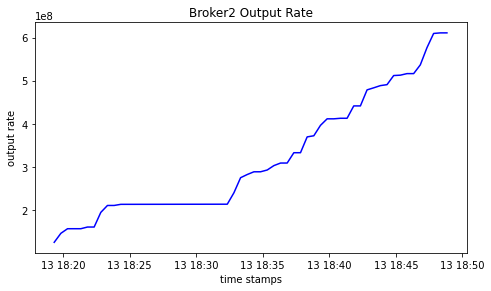

In [16]:
from datetime import datetime
#Output Rate for the entire load test
o2=[]
for dat in df2b.timestamp:
    # print (dat)
    o2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig2 = plt.figure(figsize=(10,4))
axe2 = fig2.add_axes([0.2, 0.1, 0.6, 0.8])
axe2.plot(o2,df2b['values'], 'b')
axe2.set_xlabel('time stamps')
axe2.set_ylabel('output rate')
axe2.set_title('Broker2 Output Rate')
#fig1.tight_layout()

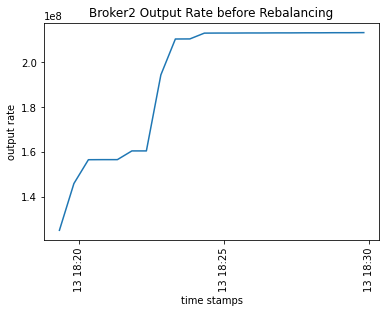

In [17]:
#Output Rate before rebalancing
b2=[]
for dat in orbr2.timestamp:
    # print (dat)
    b2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b2,orbr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('output rate')
plt.title('Broker2 Output Rate before Rebalancing')
plt.show()

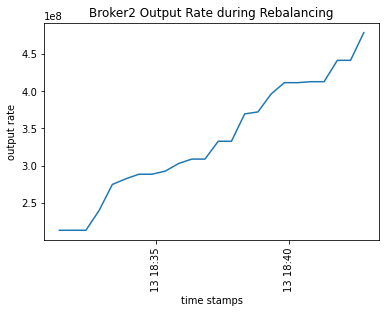

In [18]:
#Output Rate during rebalancing
d2=[]
for dat in ordr2.timestamp:
    # print (dat)
    d2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d2,ordr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('output rate')
plt.title('Broker2 Output Rate during Rebalancing')
plt.show()

In [19]:
# DA on the Output Rate of Broker-3
df3b = pd.read_csv("Brok3OR.csv")
df3b.drop(['name'], axis=1, inplace=True)
df3b['timestamp'] = pd.to_datetime(df3b['timestamp'], unit='s')
df3b.head(3)

,timestamp,values,pod
0,2021-08-13 18:19:55,149646147,my-cluster-metrics-kafka-2
1,2021-08-13 18:20:25,152246333,my-cluster-metrics-kafka-2
2,2021-08-13 18:20:55,152246333,my-cluster-metrics-kafka-2


In [20]:
#Average Output Rate before rebalancing
orbr3 = df3b[(df3b['timestamp'] >= '2021-08-13 18:19:55') & (df3b['timestamp'] <= '2021-08-13 18:30:00')]
orbr3.head(3)
orbr3avg = orbr3['values'].mean()
print(orbr3avg)
orbr3.describe()

185830573.95238096


,values
count,2.100000e+01
mean,1.858306e+08
std,2.172341e+07
min,1.496461e+08
25%,1.580192e+08
50%,2.010483e+08
75%,2.010483e+08
max,2.010483e+08


In [21]:
#Average Output Rate During rebalancing
ordr3 = df3b[(df3b['timestamp'] >= '2021-08-13 18:31:00') & (df3b['timestamp'] <= '2021-08-13 18:43:00')]
ordr3.head(3)
ordr3avg = ordr3['values'].mean()
print(ordr3avg)
ordr3.describe()

366949723.7916667


,values
count,2.400000e+01
mean,3.669497e+08
std,1.026872e+08
min,2.010483e+08
25%,3.113178e+08
50%,3.531117e+08
75%,4.633268e+08
max,5.360353e+08


In [22]:
#T-Stats Analysis
from scipy.stats import ttest_ind
resb3or = ttest_ind(ordr3['values'], orbr3['values'])
print(resb3or)

Ttest_indResult(statistic=7.918395117655173, pvalue=6.188167259480021e-10)


In [23]:
orbr3.drop(['pod'], axis=1, inplace=True)
orbr3.head(10)
orbr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  21 non-null     datetime64[ns]
 1   values     21 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 504.0 bytes


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
ordr3.drop(['pod'], axis=1, inplace=True)
ordr3.head(10)
ordr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 23 to 46
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  24 non-null     datetime64[ns]
 1   values     24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 576.0 bytes


Text(0.5, 1.0, 'Broker3 Output Rate')

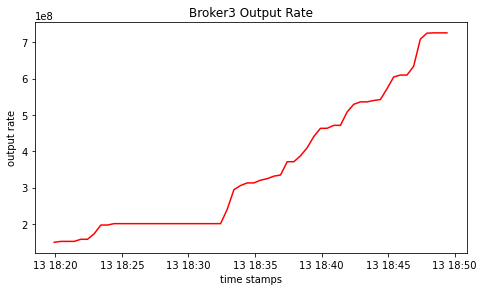

In [25]:
from datetime import datetime
#Output Rate for the entire load test
o3=[]
for dat in df3b.timestamp:
    # print (dat)
    o3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig3 = plt.figure(figsize=(10,4))
axe3 = fig3.add_axes([0.2, 0.1, 0.6, 0.8])
axe3.plot(o3,df3b['values'], 'r')
axe3.set_xlabel('time stamps')
axe3.set_ylabel('output rate')
axe3.set_title('Broker3 Output Rate')
#fig1.tight_layout()

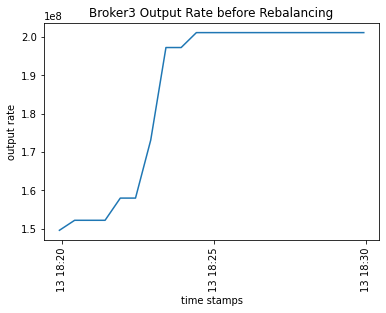

In [26]:
#Output Rate before rebalancing
b3=[]
for dat in orbr3.timestamp:
    # print (dat)
    b3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b3,orbr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('output rate')
plt.title('Broker3 Output Rate before Rebalancing')
plt.show()

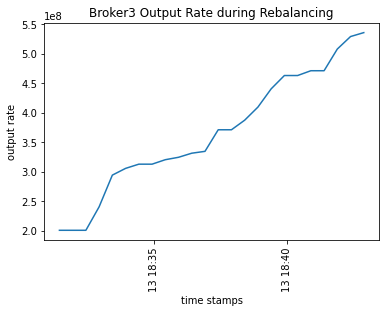

In [27]:
#Output Rate during rebalancing
d3=[]
for dat in ordr3.timestamp:
    # print (dat)
    d3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d3,ordr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('output rate')
plt.title('Broker3 Output Rate during Rebalancing')
plt.show()

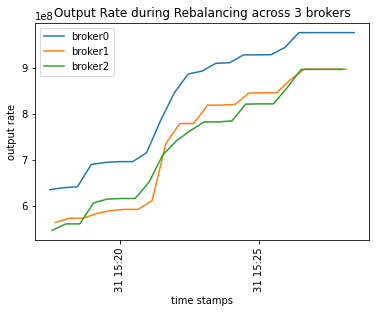

In [34]:
plt.plot(d1,ordr1['values'])
plt.plot(d2,ordr2['values'])
plt.plot(d3,ordr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('output rate')
plt.title('Output Rate during Rebalancing across 3 brokers')
plt.legend(['broker0', 'broker1', 'broker2'], loc='best')
plt.show()